In [17]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [18]:
mnist=keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [19]:
temp=xtrain[0]
(img_len,img_width)=temp.shape
print("The image is ",img_len," x ",img_width)
xtrain=xtrain/255
xtest=xtest/255

The image is  28  x  28


In [20]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6535 - accuracy: 0.8348 - val_loss: 0.3540 - val_accuracy: 0.9032
Epoch 2/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3345 - accuracy: 0.9072 - val_loss: 0.2907 - val_accuracy: 0.9200
Epoch 3/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2853 - accuracy: 0.9194 - val_loss: 0.2586 - val_accuracy: 0.9292
Epoch 4/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2554 - accuracy: 0.9279 - val_loss: 0.2360 - val_accuracy: 0.9336
Epoch 5/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2333 - accuracy: 0.9345 - val_loss: 0.2168 - val_accuracy: 0.9396
Epoch 6/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2154 - accuracy: 0.9399 - val_loss: 0.2057 - val_accuracy: 0.9415
Epoch 7/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2004 - accuracy: 0.9442 - val_loss: 0.1903 - val_acc

In [22]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Loss = %.3f"%test_loss)
print("Acc = %.3f"%test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1559 - accuracy: 0.9552
Loss = 0.156
Acc = 0.955


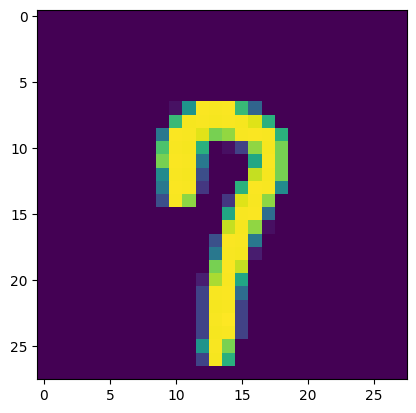

In [23]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [24]:
predicted_value=model.predict(xtest)
import numpy as np
print("Target Value: ",ytest[n])
print("Predicted Value: ",np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Target Value:  7
Predicted Value:  7


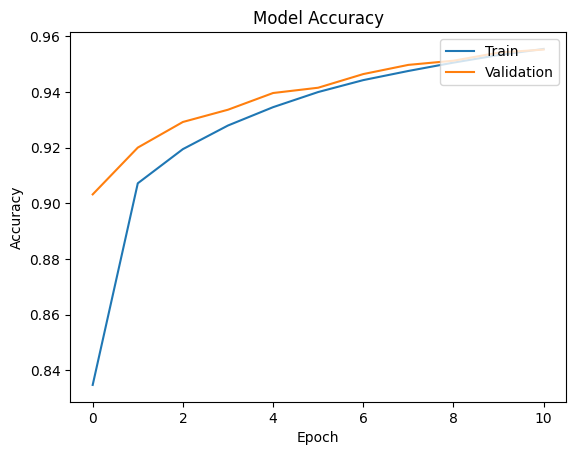

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

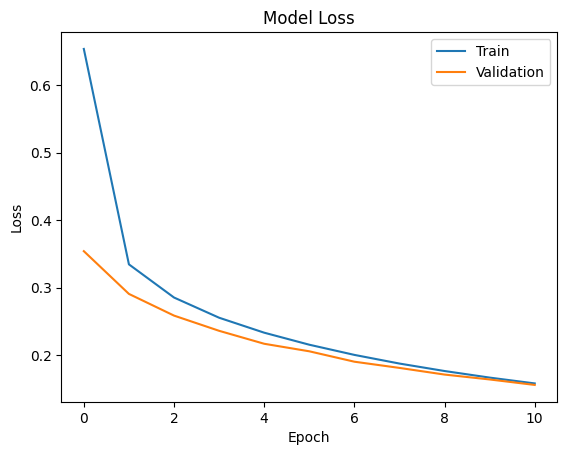

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()